# Gesture Recognition and Pose Analysis Using MediaPipe Pose Landmark Detection

Multimodal Systems, 2023-2024

Eduard Martín and Anna Pallarès

In [37]:
# Install the MediaPipe library
!pip install mediapipe opencv-python

In [38]:
# Import all necessary libraries
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Some previous steps: drawing utilities and pose estimation model (BlazePose)
mp_drawing = mp.solutions.drawing_utils 
mp_pose = mp.solutions.pose 

# Step 1. Import and read the clip

In [39]:
## Setup mediapipe instance

# Initialize the VideoCapture object to read a video stored in the folder "media" of our project folder
cap = cv2.VideoCapture('Introduction to Pose Detection and Pose Classification/media/Ballet Workout 4.mp4')
all_frame_landmarks = []

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break  # Break the loop when video playback reaches the end
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark

            # Create a list to store landmark coordinates for the current frame
            frame_landmarks = []
            for landmark in landmarks:
                # Append X, Y, Z coordinates of each landmark to the list
                frame_landmarks.extend([landmark.x, landmark.y, landmark.z])
                
            # Append frame's landmarks to the list
            all_frame_landmarks.append(frame_landmarks)
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Step 2. Collet data from landmarks

In [22]:
## Create a landmark dadtaframe for each space component 

# Initialize lists to store separated X, Y, and Z coordinates for all frames
x_components, y_components, z_components = [], [], []

# Extract X, Y, and Z components for each frame
for frame_landmarks in all_frame_landmarks:
    x_components.append(frame_landmarks[0::3])  # Extract every 3rd element starting at 0
    y_components.append(frame_landmarks[1::3])  # Extract every 3rd element starting at 1
    z_components.append(frame_landmarks[2::3])  # Extract every 3rd element starting at 2

# Create DataFrames from the lists
df_x = pd.DataFrame(x_components, columns=[f'Landmark {i}' for i in range(33)])
df_y = pd.DataFrame(y_components, columns=[f'Landmark {i}' for i in range(33)])
df_z = pd.DataFrame(z_components, columns=[f'Landmark {i}' for i in range(33)])


In [23]:
# Get the frame rate needed to calculate the time interval for the velocity
cap = cv2.VideoCapture('Introduction to Pose Detection and Pose Classification/media/Ballet Workout 4.mp4')
frame_rate = cap.get(cv2.CAP_PROP_FPS)
print(f"Frame rate of the video: {frame_rate} frames per second")

Frame rate of the video: 30.0 frames per second


In [24]:
df_x

,Landmark 0,Landmark 1,Landmark 2,Landmark 3,Landmark 4,Landmark 5,Landmark 6,Landmark 7,Landmark 8,Landmark 9,...,Landmark 23,Landmark 24,Landmark 25,Landmark 26,Landmark 27,Landmark 28,Landmark 29,Landmark 30,Landmark 31,Landmark 32
0,0.497746,0.501233,0.503380,0.505644,0.492197,0.488715,0.485190,0.507774,0.480406,0.501841,...,0.519181,0.475625,0.521161,0.491408,0.524044,0.501686,0.521710,0.507431,0.544727,0.482334
1,0.497819,0.501234,0.503385,0.505685,0.492450,0.489033,0.485605,0.508005,0.480995,0.501871,...,0.519225,0.475585,0.521251,0.491314,0.524009,0.501159,0.521518,0.507060,0.544729,0.482160
2,0.497838,0.501234,0.503388,0.505721,0.492564,0.489173,0.485811,0.508228,0.481371,0.501897,...,0.519263,0.475562,0.521292,0.491294,0.523943,0.500843,0.521331,0.506805,0.544707,0.481939
3,0.497878,0.501241,0.503403,0.505767,0.492662,0.489272,0.485941,0.508441,0.481610,0.501962,...,0.519546,0.475604,0.521569,0.491304,0.523926,0.500614,0.521209,0.506556,0.544843,0.481855
4,0.498297,0.501498,0.503699,0.506147,0.493202,0.489797,0.486437,0.508906,0.482259,0.502262,...,0.520165,0.475975,0.521658,0.491295,0.523925,0.500428,0.521164,0.506424,0.545037,0.481622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.498339,0.501326,0.503488,0.505265,0.492606,0.489178,0.485900,0.506294,0.480145,0.502627,...,0.529465,0.484926,0.573938,0.495545,0.618972,0.501980,0.617747,0.509835,0.639552,0.475447
798,0.497406,0.500220,0.502322,0.504114,0.491545,0.488120,0.484938,0.505193,0.479271,0.501695,...,0.527803,0.483104,0.573102,0.495485,0.617420,0.502106,0.616428,0.509897,0.637068,0.475334
799,0.496592,0.499564,0.501638,0.503499,0.490835,0.487350,0.484147,0.504935,0.478920,0.501133,...,0.528072,0.483492,0.572752,0.495357,0.617242,0.502232,0.616291,0.510029,0.635788,0.475298
800,0.495467,0.498729,0.500845,0.502683,0.489948,0.486468,0.483270,0.504364,0.478497,0.500371,...,0.527726,0.483150,0.571249,0.495319,0.615977,0.502286,0.614919,0.510052,0.634414,0.474856


# Step 3. Calculate kinetic energy

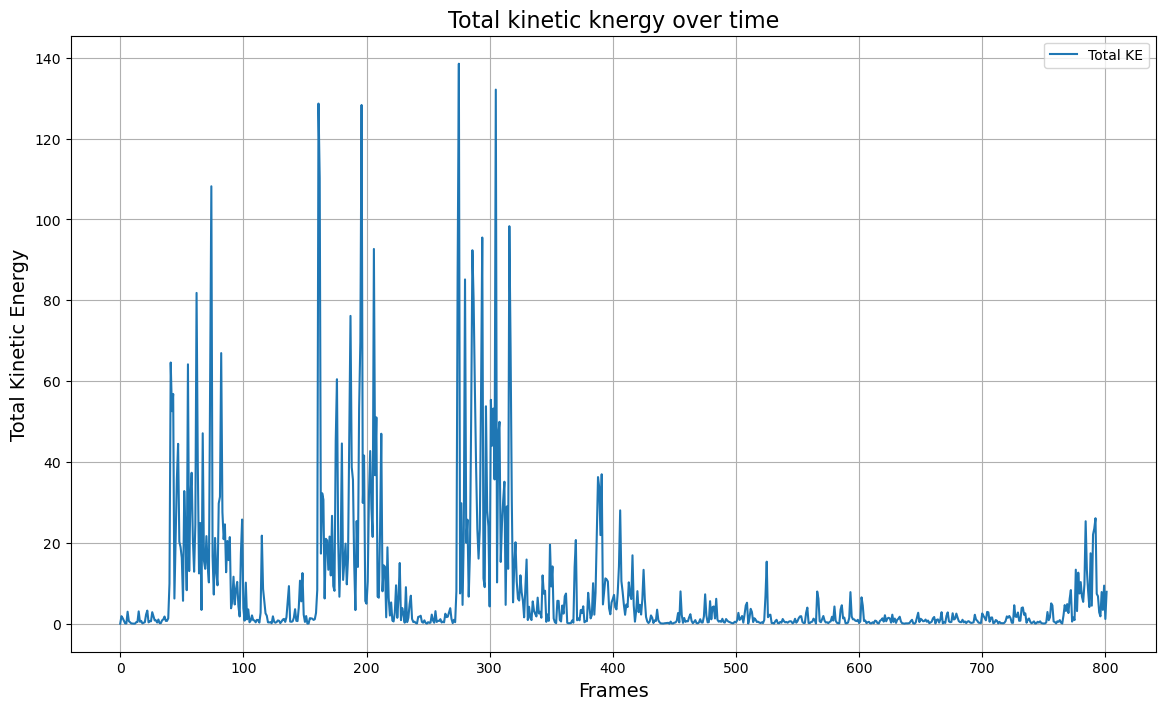

<Figure size 640x480 with 0 Axes>

In [25]:
## 1---- Data needed for the body mass proportions used in the kinetic energy, extracted from the professors PDF. These data has been normalized.

Michigan_data = [   ('Head and neck', 8.59),
                    ('Shoulders and thorax', 17.61),
                    ('Arms and forearms', 9.05),
                    ('Hands', 1.33),
                    ('Abdominopelvic trunk', 28.62),
                    ('Thighs and shanks', 31.70),
                    ('Feet', 3.10)
                ]


## 2---- Velocity calculation

# Calculate time interval
time_interval = 1 / frame_rate

# Calculate velocities
velocity_df_x = df_x.diff().fillna(0) / time_interval
velocity_df_y = df_y.diff().fillna(0) / time_interval
velocity_df_z = df_z.diff().fillna(0) / time_interval


## 3---- Mass proportions calculation from the Michigan Data

# Associate each body part mass to a set of landmarks. Note that the mass is distributed equally for each landmark
body_parts_landmarks = {'Head and neck': list(range(0, 11)),
                        'Shoulders and thorax': list(range(11, 13)),
                        'Arms and forearms': list(range(13, 15)),
                        'Hands': list(range(15, 23)),
                        'Abdominopelvic trunk': list(range(23, 25)),
                        'Thighs and shanks': list(range(25, 27)),
                        'Feet': list(range(27, 33))
                        }

# Now create a new column in the dataframe where the mass proporion in parts per unit is displayed for each of the 33 landmarks. Let's first create a list comprehension:
data = [(percentage / len(body_parts_landmarks[body_part])) 
        for body_part, percentage in Michigan_data
        for landmark in body_parts_landmarks[body_part]]

mass_proportions = pd.DataFrame(data, columns=['Mass Proportion']).T


## 4---- Kinetic energy calculation using the 3 different velocity dataframes
ke_df = sum(0.5 * velocity_df.diff().fillna(0).pow(2).multiply(mass_proportions.values, axis="columns")
            for velocity_df in [velocity_df_x, velocity_df_y, velocity_df_z])

# Sum all the components to get the total kinetic energy for each time frame
total_ke_per_frame = ke_df.sum(axis=1)
total_ke_per_frame_df = pd.DataFrame(total_ke_per_frame, columns=['Total Kinetic Energy'])


## 5---- Plot total kinetic energy
plt.figure(figsize=(14, 8))
plt.plot(total_ke_per_frame_df.index, total_ke_per_frame_df['Total Kinetic Energy'], label='Total KE')

plt.xlabel('Frames', fontsize=14)
plt.ylabel('Total Kinetic Energy', fontsize=14)
plt.title('Total kinetic knergy over time', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('kinetic_energy')

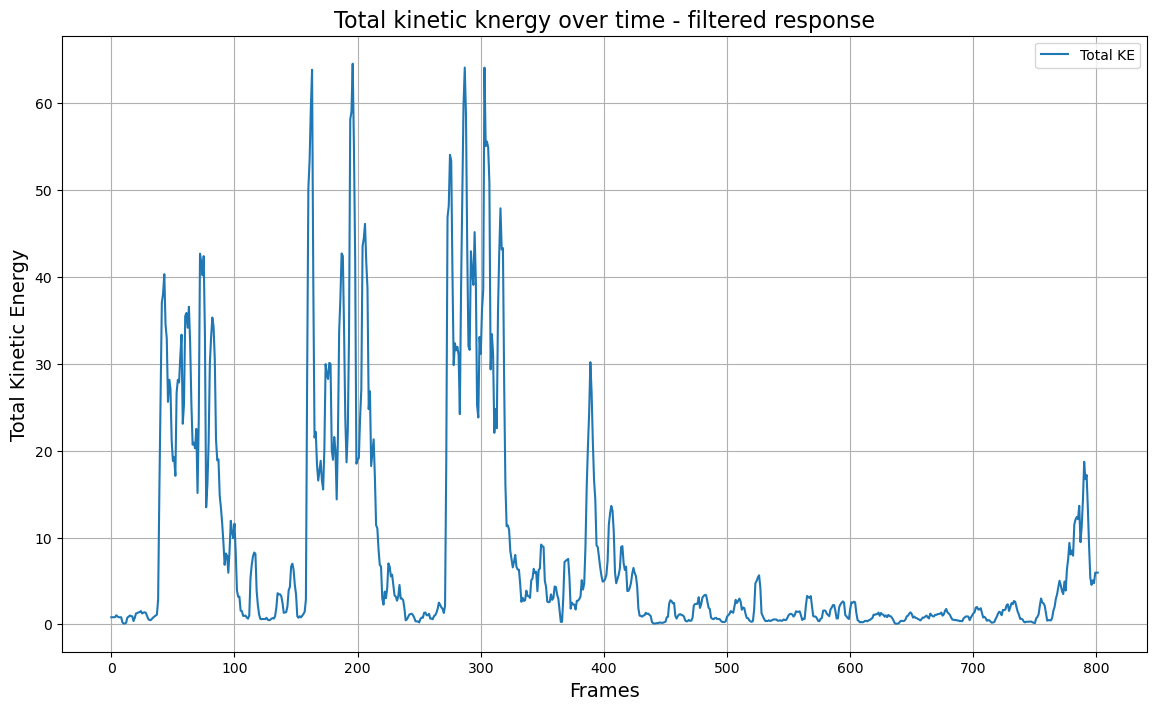

<Figure size 640x480 with 0 Axes>

In [42]:
## 6---- Clean the response with a filter 
window_size = 5
total_ke_per_frame_df['Smoothed KE'] = total_ke_per_frame_df['Total Kinetic Energy'].rolling(window=window_size, center=True).mean().fillna(method='bfill').fillna(method='ffill')

# Plot of the filtered response
plt.figure(figsize=(14, 8))
plt.plot(total_ke_per_frame_df.index, total_ke_per_frame_df['Smoothed KE'], label='Total KE')

plt.xlabel('Frames', fontsize=14)
plt.ylabel('Total Kinetic Energy', fontsize=14)
plt.title('Total kinetic knergy over time - filtered response', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('kinetic_energy_filtered')

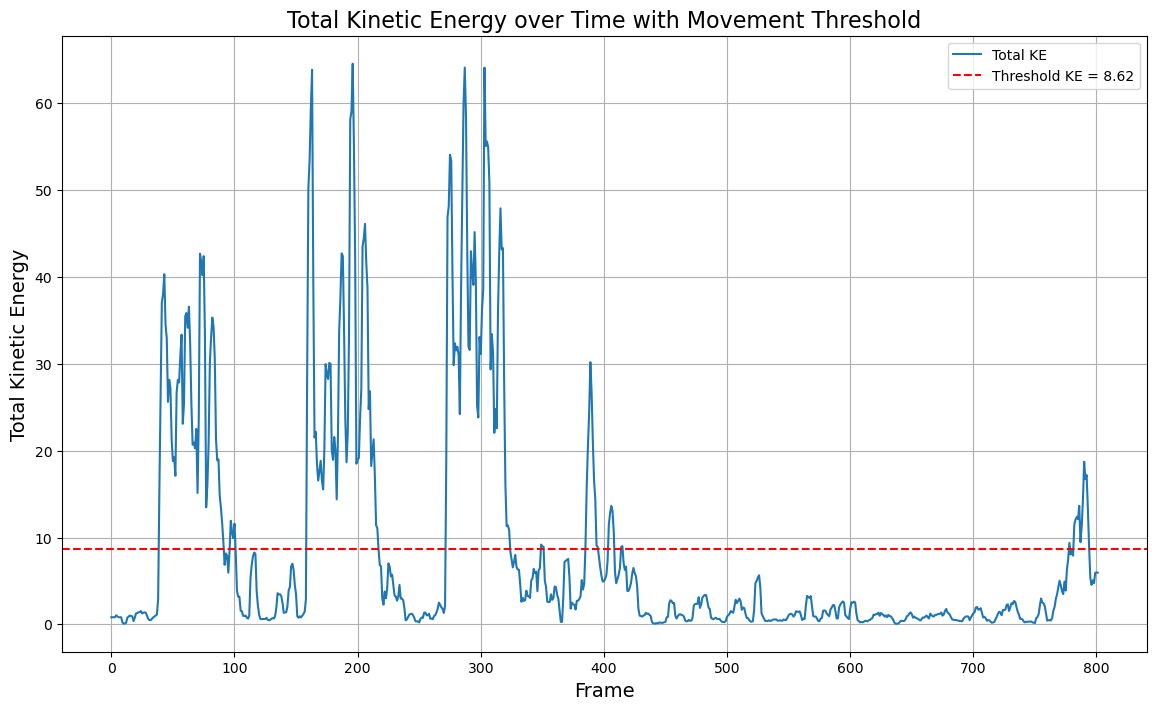

<Figure size 640x480 with 0 Axes>

In [27]:
## 7---- Set a threshold value for kinetic energy
# The data contains a mix of activity and rest, the mean kinetic energy represents an average level of energy expenditure. 
# Movements that are significantly more energetic than this average will stand out.
threshold_ke = total_ke_per_frame_df['Smoothed KE'].mean()

# Create a new column in the df to indicate movement
total_ke_per_frame_df['Is Moving'] = total_ke_per_frame_df['Smoothed KE'] > threshold_ke

# Plot the kinetic energy and the threshold
plt.figure(figsize=(14, 8))
plt.plot(total_ke_per_frame_df.index, total_ke_per_frame_df['Smoothed KE'], label='Total KE')
plt.axhline(y=threshold_ke, color='r', linestyle='--', label=f'Threshold KE = {threshold_ke:.2f}')

plt.xlabel('Frame', fontsize=14)
plt.ylabel('Total Kinetic Energy', fontsize=14)
plt.title('Total Kinetic Energy over Time with Movement Threshold', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('kinetic_energy_thereshold')

# Step 4: Determine where is movement and where is not

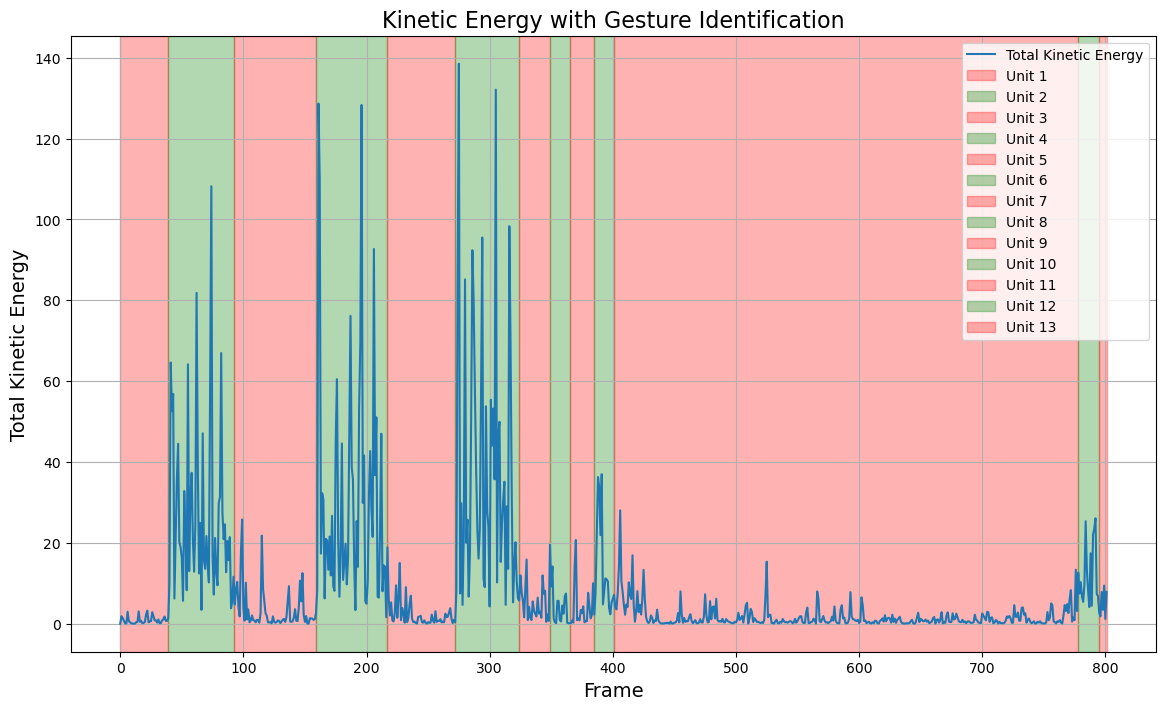

In [28]:
## 8----Find where the movement status changes

# Initialize variables
intervals_dict = {}
unit_count = 1
current_label = None
current_start = None
frame_diff = 15

# Iterate through the DataFrame to detect intervals
for index, row in total_ke_per_frame_df.iterrows():
    timestamp = row.name
    label = "Movement unit" if row['Is Moving'] else "Pause"

    if current_label is None:
        current_label, current_start = label, timestamp
    elif label != current_label and timestamp - current_start > frame_diff:
        intervals_dict[f"Unit {unit_count}"] = {"Interval": (current_start, index), "Label": current_label}
        unit_count += 1
        current_label, current_start = label, timestamp

# Add the last interval
if current_label is not None:
    intervals_dict[f"Unit {unit_count}"] = {"Interval": (current_start, total_ke_per_frame_df.index[-1]), "Label": current_label}


## 9---= Plot the different intervals

plt.figure(figsize=(14, 8))
plt.plot(total_ke_per_frame_df.index, total_ke_per_frame_df['Total Kinetic Energy'], label='Total Kinetic Energy')

# Color-code based on intervals in intervals_dict
for gesture, details in intervals_dict.items():
    start, end = details["Interval"]
    label = details["Label"]
    color = 'green' if label == "Movement unit" else 'red'
    plt.axvspan(start, end, color=color, alpha=0.3, label=gesture)

# To avoid duplicating labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())

plt.xlabel('Frame', fontsize=14)
plt.ylabel('Total Kinetic Energy', fontsize=14)
plt.title('Kinetic Energy with Gesture Identification', fontsize=16)
plt.grid(True)
plt.show()

# Step 5: Average 2D and 3D directions of the movements

In [29]:
# Dictionary to store the body parts

body_parts_dict = { "face": list(range(11)),
                    "right_arm": list(range(11, 22, 2)),
                    "left_arm": list(range(12, 23, 2)),
                    "right_leg": list(range(23, 32, 2)),
                    "left_leg": list(range(24, 33, 2)),
                    "upper_body": list(range(23)),
                    "lower_body": list(range(23, 33)),
                    "whole_body": list(range(33))
                    }

In [30]:
# Define a function to obtain the 2d average directions for the selected landmarks and for each gesture

def compute_2D_average_directions(body_part, gesture_label):
    """
    Computes the 2D average directions for each plane (XY, XZ, and YZ) for a specified gesture and body part.
    
    Parameters:
    - body_part: str, the name of the body part to analyze (must match a key in body_parts_dict)
    - gesture_label: str, the label of the gesture to analyze
    """
    # Check if the gesture and body part are in the dictionary
    if gesture_label not in intervals_dict or body_part not in body_parts_dict:
        raise ValueError(f"Gesture '{gesture_label}' or body part '{body_part}' not found.")
    
    # Get the frame interval for the gesture and the landmark indices for the body part given as inputs
    frame_interval = intervals_dict[gesture_label]['Interval']
    landmarks_indices = body_parts_dict[body_part]

    # Select the relevant columns and rows for the body part within the frame interval
    df_x_part = df_x.iloc[frame_interval[0]:frame_interval[1], landmarks_indices]
    df_y_part = df_y.iloc[frame_interval[0]:frame_interval[1], landmarks_indices]
    df_z_part = df_z.iloc[frame_interval[0]:frame_interval[1], landmarks_indices]

    # Compute the differences (displacement vectors) for each dimension
    diff_x, diff_y, diff_z = df_x_part.diff().fillna(0), df_y_part.diff().fillna(0), df_z_part.diff().fillna(0)

    # Now comput the average direction vectors for each plane
    avg_dir_xy = (diff_x.mean().mean(), diff_y.mean().mean()) # first we compute the mean of each column and after the mean of all the values
    avg_dir_xz = (diff_x.mean().mean(), diff_z.mean().mean())
    avg_dir_yz = (diff_y.mean().mean(), diff_z.mean().mean())

    # Normalize the vectors for an easy representation and interpretation
    avg_dir_xy = np.array(avg_dir_xy) / np.linalg.norm(avg_dir_xy)
    avg_dir_xz = np.array(avg_dir_xz) / np.linalg.norm(avg_dir_xz)
    avg_dir_yz = np.array(avg_dir_yz) / np.linalg.norm(avg_dir_yz)
    
    return avg_dir_xy, avg_dir_xz, avg_dir_yz

In [31]:
# Now make a loop to call automatically the function for each of the body parts and for all the gesstures.

for body_part in body_parts_dict.keys():
    for gesture_label in intervals_dict.keys():
        # Call the function
        avg_dir_xy, avg_dir_xz, avg_dir_yz = compute_2D_average_directions(body_part, gesture_label)
        # Print the results
        print(f"Body Part: {body_part}, {gesture_label}")
        print(f"Average Direction on XY plane: {avg_dir_xy}")
        print(f"Average Direction on XZ plane: {avg_dir_xz}")
        print(f"Average Direction on YZ plane: {avg_dir_yz}\n")


Body Part: face, Unit 1
Average Direction on XY plane: [0.98366269 0.1800214 ]
Average Direction on XZ plane: [ 0.58527448 -0.81083523]
Average Direction on YZ plane: [ 0.13096289 -0.99138727]

Body Part: face, Unit 2
Average Direction on XY plane: [-0.32566996 -0.94548351]
Average Direction on XZ plane: [-0.01792135 -0.9998394 ]
Average Direction on YZ plane: [-0.05196724 -0.99864879]

Body Part: face, Unit 3
Average Direction on XY plane: [-0.72612985  0.68755759]
Average Direction on XZ plane: [-0.0839489   0.99647006]
Average Direction on YZ plane: [0.07951849 0.99683339]

Body Part: face, Unit 4
Average Direction on XY plane: [ 0.70514766 -0.70906049]
Average Direction on XZ plane: [ 0.13533594 -0.99079977]
Average Direction on YZ plane: [-0.13607305 -0.99069881]

Body Part: face, Unit 5
Average Direction on XY plane: [-0.46855108  0.88343641]
Average Direction on XZ plane: [-0.19323989  0.98115154]
Average Direction on YZ plane: [0.34811872 0.93745046]

Body Part: face, Unit 6
Av

In [32]:
# Use the previous function which computes the average directions to create a new function that makes the plots

def plot_2D_average_directions(body_part, gesture_label):
    """
    Plots the 2D average directions for each plane (XY, XZ, and YZ) for a specified gesture and body part.
    
    Parameters:
    - body_part: str, the name of the body part to analyze
    - gesture_label: str, the label of the gesture to analyze
    """

    # Call the function that computes the average directions 
    avg_dir_xy, avg_dir_xz, avg_dir_yz = compute_2D_average_directions(body_part, gesture_label)
    
    # Some adjustments for the plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    colors = ['r', 'g', 'b']
    planes = ['XY', 'XZ', 'YZ']

    # Iterate through each plane
    for ax, avg_dir, color, plane_label in zip(axes, [avg_dir_xy, avg_dir_xz, avg_dir_yz], colors, planes):
        ax.quiver(0, 0, avg_dir[0], avg_dir[1], angles='xy', scale_units='xy', scale=1, color=color)
        ax.set_title(f'Avg. Direction on {plane_label} plane for {body_part} on {gesture_label}')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_xlabel('X Direction' if plane_label != 'YZ' else 'Y Direction')
        ax.set_ylabel('Y Direction' if plane_label == 'XY' else 'Z Direction')
    plt.tight_layout()
    plt.show()


Now plot some graphs for the desired body parts along diferent gestures for further analysis and interpretation:

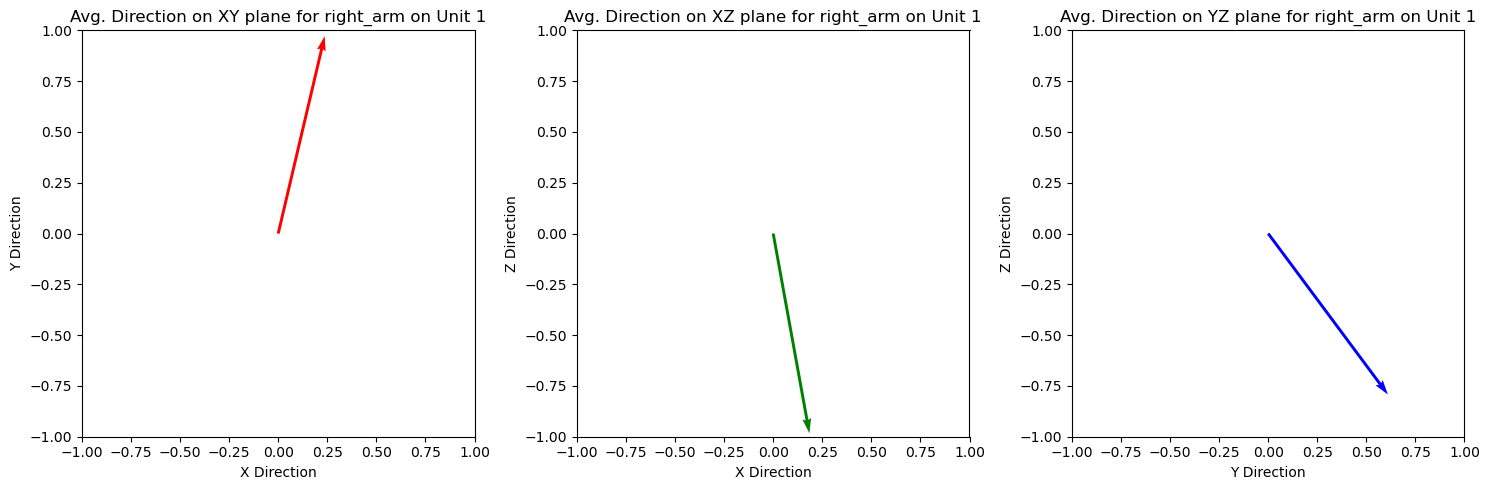

In [33]:
plot_2D_average_directions('right_arm', 'Unit 1')


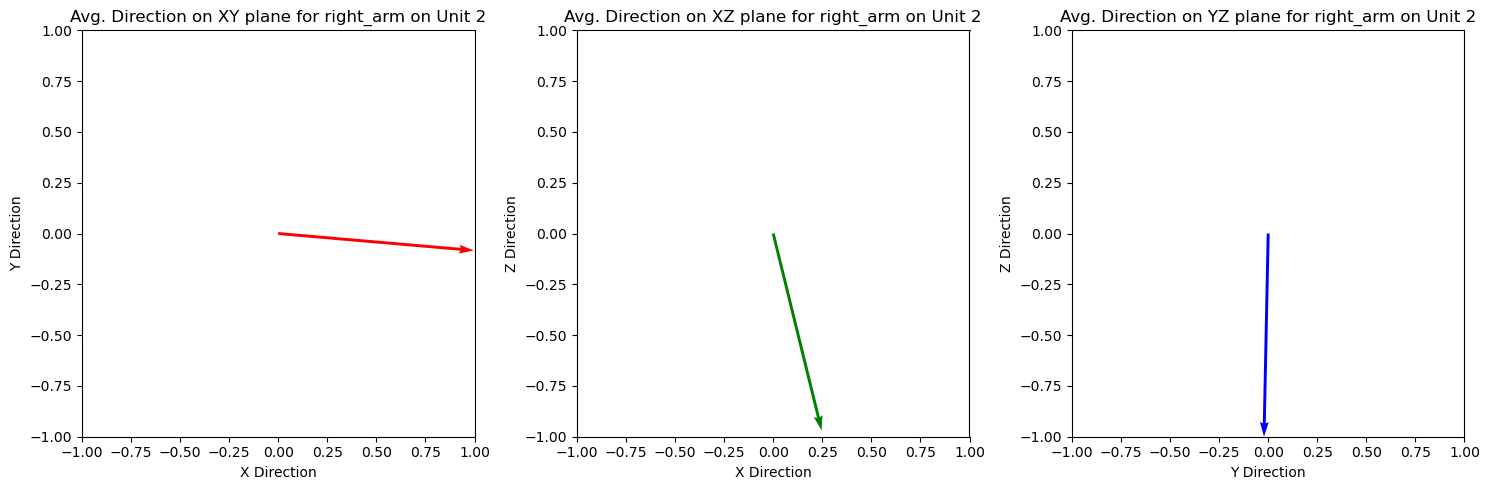

In [34]:
plot_2D_average_directions('right_arm', 'Unit 2')

In [35]:
# Function that computes the 3D average direction for each body part

def compute_3d_average_direction(body_part, gesture_label):
    """
    Computes the normalized 3D average directions for each body part during the whole clip.
    
    Parameters:
    - body_part: str, the name of the body part to analyze
    
    """
    # Check if the gesture and body part are in the dictionary
    if gesture_label not in intervals_dict or body_part not in body_parts_dict:
        raise ValueError(f"Gesture '{gesture_label}' or body part '{body_part}' not found.")
    
    # Get the frame interval for the gesture and the landmark indices for the body part given as inputs
    frame_interval = intervals_dict[gesture_label]['Interval']
    landmarks_indices = body_parts_dict[body_part]

    # Select the relevant columns and rows for the body part within the frame interval
    df_x_part = df_x.iloc[frame_interval[0]:frame_interval[1], landmarks_indices]
    df_y_part = df_y.iloc[frame_interval[0]:frame_interval[1], landmarks_indices]
    df_z_part = df_z.iloc[frame_interval[0]:frame_interval[1], landmarks_indices]
    
    diff_x, diff_y, diff_z = df_x_part.diff().fillna(0), df_y_part.diff().fillna(0), df_z_part.diff().fillna(0)

    avg_dir_x, avg_dir_y, avg_dir_z = diff_x.mean().mean(), diff_y.mean().mean(), diff_z.mean().mean()

    # Compute the magnitude of the resulting vector
    magnitude = np.linalg.norm([avg_dir_x, avg_dir_y, avg_dir_z])

    # Normalize each component by dividing by the magnitude
    avg_dir_x, avg_dir_y, avg_dir_z = avg_dir_x / magnitude, avg_dir_y / magnitude, avg_dir_z / magnitude

    return body_part, avg_dir_x, avg_dir_y, avg_dir_z


In [36]:
# Loop through each body part in the body_parts_dict and call the function for each gesture
for body_part in body_parts_dict.keys():
    for gesture_label in intervals_dict.keys():
        _, avg_dir_x, avg_dir_y, avg_dir_z = compute_3d_average_direction(body_part, gesture_label)
        print(f"Average 3D Direction for {body_part} during {gesture_label}: ({avg_dir_x:.3f}, {avg_dir_y:.3f}, {avg_dir_z:.3f})")


Average 3D Direction for face during Unit 1: (0.582, 0.107, -0.806)
Average 3D Direction for face during Unit 2: (-0.018, -0.052, -0.998)
Average 3D Direction for face during Unit 3: (-0.084, 0.079, 0.993)
Average 3D Direction for face during Unit 4: (0.134, -0.135, -0.982)
Average 3D Direction for face during Unit 5: (-0.182, 0.342, 0.922)
Average 3D Direction for face during Unit 6: (0.003, -0.062, -0.998)
Average 3D Direction for face during Unit 7: (-0.168, 0.056, 0.984)
Average 3D Direction for face during Unit 8: (0.331, 0.065, -0.941)
Average 3D Direction for face during Unit 9: (0.496, 0.032, -0.868)
Average 3D Direction for face during Unit 10: (0.692, 0.114, -0.713)
Average 3D Direction for face during Unit 11: (-0.066, 0.809, 0.584)
Average 3D Direction for face during Unit 12: (-0.451, -0.665, -0.595)
Average 3D Direction for face during Unit 13: (-0.062, 0.000, 0.998)
Average 3D Direction for right_arm during Unit 1: (0.147, 0.603, -0.784)
Average 3D Direction for right_ar